In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl

In [2]:
req = ['regularization', 'gaussian']

if 'regularization' in req:
    print('yes')

print("'method' has to be " + ', '.join(req))   

yes
'method' has to be regularization, gaussian


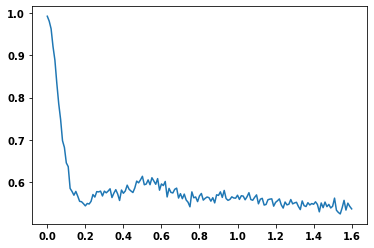

In [3]:
loaded_data = np.genfromtxt("../../data/2g_Pid-1388_Sid-14056.dat", skip_header = 1, delimiter = ',')
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

plt.plot(t, Vexp)

In [4]:
pars = {"method": 'gaussian', "nGauss": 2}

print(pars.keys())

print(pars['method'])
print(pars.method)

dict_keys(['method', 'nGauss'])
gaussian


AttributeError: 'dict' object has no attribute 'method'

In [5]:
model = dive.model(t, Vexp, pars)

print(model)

d:\research\projects\software\bayes\dive\dive\utils.py:53: RuntimeWarning: invalid value encountered in true_divide
  K[:,ir] = (np.cos(ph)*C+np.sin(ph)*S)/kappa
{'model_graph': <pymc3.model.Model object at 0x000001EB5DFCA880>, 'model_pars': {'r': array([ 1.  ,  1.02,  1.04,  1.06,  1.08,  1.1 ,  1.12,  1.14,  1.16,
        1.18,  1.2 ,  1.22,  1.24,  1.26,  1.28,  1.3 ,  1.32,  1.34,
        1.36,  1.38,  1.4 ,  1.42,  1.44,  1.46,  1.48,  1.5 ,  1.52,
        1.54,  1.56,  1.58,  1.6 ,  1.62,  1.64,  1.66,  1.68,  1.7 ,
        1.72,  1.74,  1.76,  1.78,  1.8 ,  1.82,  1.84,  1.86,  1.88,
        1.9 ,  1.92,  1.94,  1.96,  1.98,  2.  ,  2.02,  2.04,  2.06,
        2.08,  2.1 ,  2.12,  2.14,  2.16,  2.18,  2.2 ,  2.22,  2.24,
        2.26,  2.28,  2.3 ,  2.32,  2.34,  2.36,  2.38,  2.4 ,  2.42,
        2.44,  2.46,  2.48,  2.5 ,  2.52,  2.54,  2.56,  2.58,  2.6 ,
        2.62,  2.64,  2.66,  2.68,  2.7 ,  2.72,  2.74,  2.76,  2.78,
        2.8 ,  2.82,  2.84,  2.86,  2.88,  2.9 ,  2.

In [12]:
pars = {"method": 'tikhonov', "r": np.linspace(2,6,200)}

model = dive.model(t, Vexp, pars)

print(model)

SystemExit: keyword 'method' has to be one of the following: regularization, gaussian

In [13]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model = dive.model(t, Vexp, pars)

print(model)

{'model_graph': <pymc3.model.Model object at 0x000001EB5E76CA30>, 'model_pars': {'K0': array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.93474922,  0.93846401,  0.94193821, ...,  0.99990457,
         0.99990647,  0.99990834],
       [ 0.75686537,  0.76976721,  0.78193419, ...,  0.9996183 ,
         0.99962593,  0.99963339],
       ...,
       [ 0.03552773,  0.03692153, -0.05931467, ..., -0.09482613,
        -0.08784932, -0.08072739],
       [ 0.01025689,  0.05611948, -0.0478103 , ..., -0.09909605,
        -0.09222722, -0.08521023],
       [-0.01543672,  0.06597513, -0.02948028, ..., -0.10327111,
        -0.09651117, -0.08960013]]), 'L': array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]]), 'LtL': array([[ 

In [8]:
print(model.keys())
print(model['model_pars'].keys())

dict_keys(['model_graph', 'model_pars', 't', 'Vexp'])
dict_keys(['K0', 'L', 'LtL', 'K0tK0', 'r', 'a0', 'b0', 'method', 'Vscale'])


In [9]:
model_graph = model['model_graph']

model_graph['sigma']

sigma ~ Gamma

In [16]:
MCMCparameters = {"draws": 10000,"tune": 4000, "chains": 4, 'cores': 4}

trace = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]
Bad initial energy, check any log probabilities that are inf or -inf, nan or very small:
Series([], )
There were 677 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.46953397792512874, but should be close to 0.8. Try to increase the number of tuning steps.


ParallelSamplingError: Bad initial energy

In [ ]:
dive.summary(trace, model, Pid = 1388)  

In [21]:
data, data_pars = dive.generateMultiGauss(nt = 160, seed = 129, k = 0.5, sigma = 0.01, V0 = 1.15, t_edges=[-0.1,3.0])

t = data['t']
Vexp = data['V']

In [29]:
pars = {"method": 'regularization', "r": np.linspace(2,8,150)}

model = dive.model(t, Vexp, pars)

In [30]:
MCMCparameters = {"draws": 15000,"tune": 3000, "chains": 4, "cores": 4}

trace = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]
Sampling 4 chains for 3_000 tune and 15_000 draw iterations (12_000 + 60_000 draws total) took 1997 seconds.
There were 7030 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.2892366797733528, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2768 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6043596579776541, but should be close to 0.8. Try to increase the number of tuning steps.
There were 6702 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.23166103388133064, but should be close to 0.8. Try to increase the number of tuning steps.
There were 5117 divergences after tuning. Increase `t

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.137,0.161,0.000,0.493,0.071,0.056,9.0,18.0,1.49
λ,0.769,0.115,0.497,0.865,0.052,0.039,8.0,18.0,1.49
V₀,0.990,0.007,0.979,1.002,0.001,0.001,31.0,330.0,1.13
σ,0.018,0.004,0.011,0.025,0.000,0.000,51.0,488.0,1.07
δ,88718.805,56176.951,8910.864,190317.473,3056.478,2163.125,318.0,733.0,1.03
lg(α),0.676,0.109,0.482,0.905,0.006,0.005,408.0,221.0,1.06


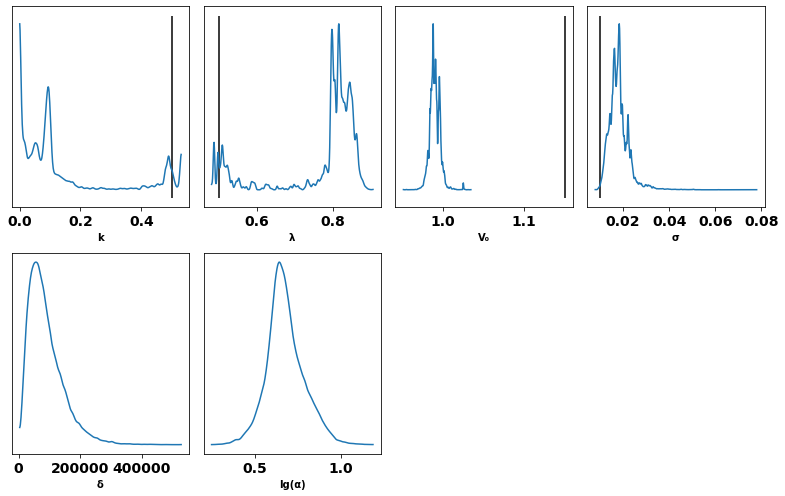

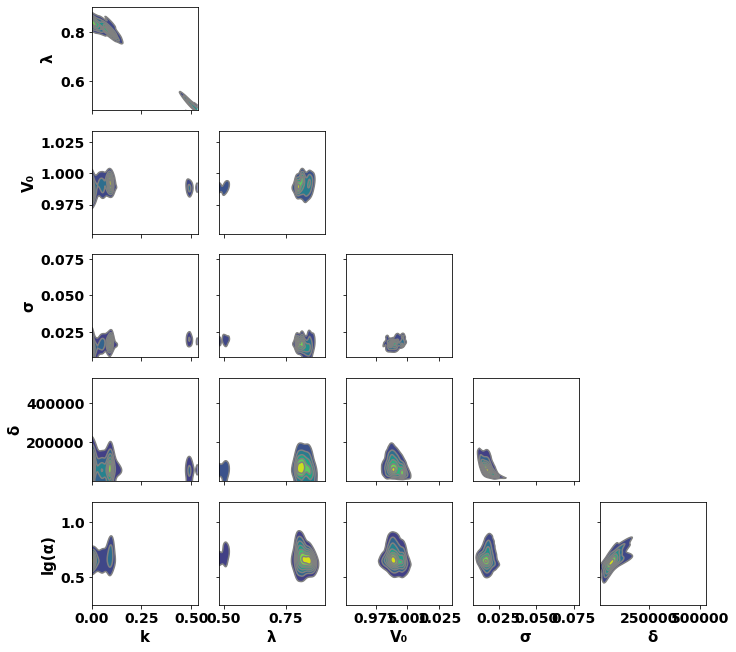

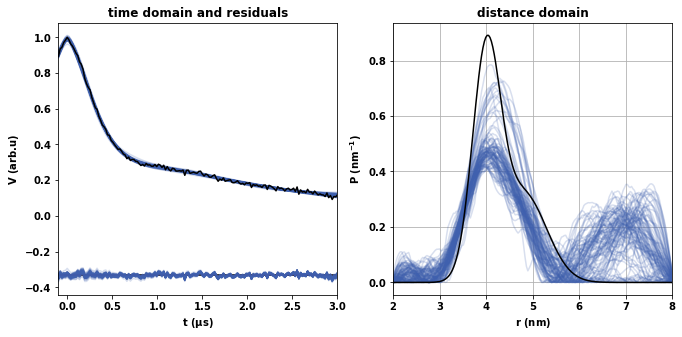

In [27]:
rref = np.linspace(2,8,200)
Ptrue = dl.dd_gauss2(rref,data_pars['gaussians'])
dive.summary(trace, model, Pref = Ptrue, rref = rref, GroundTruth = data_pars)  